<img src="../img/GTK_Logo_Social Icon.jpg" width=175 align="right" />


# Worksheet 6.0 Clustering - Answers

This worksheet covers concepts relating to Unsupervised Learning.  It should take no more than 20-30 minutes to complete.  Please raise your hand if you get stuck.  

There are many ways to accomplish the tasks that you are presented with, however you will find that by using the techniques covered in class, the exercises should be relatively simple. 

## Import the Libraries
For this exercise, we will be using:
* Pandas (https://pandas.pydata.org/pandas-docs/stable/)
* Numpy (https://docs.scipy.org/doc/numpy/reference/)
* Matplotlib (https://matplotlib.org/stable)


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.spatial.distance import cdist
style.use("ggplot")
%matplotlib inline

# Clustering with Real Data
Let's try it on some real data and see what we can produce. As before the first step is to read in the data into a DataFrame.  

We will be using this data later, but the dataset consists of approximately 6000 domains--5000 of which were generated by various botnets and 1000 are from the Alexa 1 Million.  The columns are:

* `dsrc`:  The source of the domain
* `domain`:  The actual domain
* `length`:  The length of the domain
* `dicts`:  Percentage containing dictionary words
* `entropy`:  The entropy of the domain
* `numbers`:  The number of digits in the domain
* `ngram`:  Different n-grams which appear in the domain (?)

In [7]:
data = pd.read_csv('../data/dga-full.csv')
data.sample(5)

,dsrc,domain,length,dicts,entropy,numbers,ngram
1716,bamital,821ff5e951be9aac1e97ea78709db570,32,0.000000,3.554229,19,0.000000
48039,alexa,policja,7,0.857143,2.807355,0,4.501662
46717,alexa,localytics,10,1.000000,2.921928,0,13.379096
44346,alexa,radiko,6,0.833333,2.584963,0,5.183415
16362,gameoverdga,vebf0gjwjl881lsc1w5dfw036,25,0.240000,3.973661,9,0.000000


In [8]:
data['dsrc'].value_counts()

cryptolocker    10000
gameoverdga     10000
necurs          10000
alexa           10000
nivdort          9978
bamital          2500
Name: dsrc, dtype: int64

## Scaling the Data
Since clustering relies on measuring distances between objects it is important that all data points be on the same scale.  There are various methods for doing this, which are beyond the scope of this class, however, for this example, we will use scikit-learn's `StandardScaler` to accomplish this.  (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

The StandardScaler transforms each column by:
* Subtracting from the element in each row the mean for each feature (column) and then taking this value and
* Dividing by that feature's (column's) standard deviation.

Scikit-learn has a transformer interface which is very similar to the other scikit-learn interfaces.  The basic steps are:
1.  Create the Scaler object
2.  Using the feature matrix, call the `.fit()` method to "train" the Scaler
3.  Use the `.transform()` method to scale the data.

**NOTE**: When using a Scaler, it is important to train the scaler on your data, and use this trained scalers on any future predictions. 

In [9]:
feature_columns = ['length', 'dicts','entropy','numbers','ngram']
scaled_feature_columns = ['scaled_length', 'scaled_dicts','scaled_entropy','scaled_numbers','scaled_ngram']

In [10]:
#Step 1:  Create the scaler
scaler = StandardScaler()

#Steps 2 & 3:  Fit the scaler and transform this data
scaled_df = scaler.fit_transform(data[feature_columns])

#Put the scaled data into a dataframe
scaled_df = pd.DataFrame(scaled_df, columns=scaled_feature_columns)

Take a look at the data and you'll see that the data is now all scaled consistently. 

In [11]:
scaled_df.sample(10)

,scaled_length,scaled_dicts,scaled_entropy,scaled_numbers,scaled_ngram
31956,0.510423,-1.604706,0.773518,-0.498385,-0.811719
30569,0.772946,0.359226,1.341872,-0.498385,1.099374
23839,-0.802191,0.228297,-1.020940,-0.498385,-0.811719
41660,-0.802191,1.144799,-0.876255,-0.498385,0.843315
51051,-0.277145,1.144799,0.274768,-0.498385,2.134315
41899,-0.802191,1.144799,-1.259584,-0.498385,0.936912
34803,-0.670930,1.144799,0.152606,-0.498385,0.301424
18632,1.429253,-1.604706,1.501510,1.970035,-0.811719
48959,-0.014622,1.144799,-0.218329,-0.498385,2.915397
24400,-0.670930,0.319947,-0.192390,-0.498385,-0.609769


Finally for convenience, we're going to merge the scaled data with the non-scaled data.  

In [12]:
final_data = pd.merge( data, scaled_df, left_index=True, right_index=True)

In [13]:
final_data.sample(5)

,dsrc,domain,length,dicts,entropy,numbers,ngram,scaled_length,scaled_dicts,scaled_entropy,scaled_numbers,scaled_ngram
50611,alexa,station,7,1.000000,2.521641,0,17.596496,-1.064714,1.144799,-1.227875,-0.498385,2.481154
12014,cryptolocker,cbgyqwsumwiml,13,0.461538,3.392747,0,1.380211,-0.277145,-0.335704,0.274768,-0.498385,-0.553437
38765,nivdort,watchhelp,9,1.000000,2.947703,0,9.694896,-0.802191,1.144799,-0.492925,-0.498385,1.002509
41515,nivdort,watchfool,9,1.000000,2.947703,0,9.194442,-0.802191,1.144799,-0.492925,-0.498385,0.908858
9638,cryptolocker,ivxvchymrtld,12,0.583333,3.418296,0,0.000000,-0.408407,-0.000828,0.318839,-0.498385,-0.811719


### Your Turn!
Now that we have data that is suitable (maybe) for clustering, in the section below, perform K-Means clustering on this data set.  Initially, start out with 2 clusters and assign the `cluster id` as a column in your DataFrame.

Then do a `value_counts()` on the `dsrc` column for each cluster to see how the model divided the data.  Try various values for `k` to see how it performed.

Remember to use the **scaled features** for your clustering.  

In [16]:
## Your code here...

kmeans = KMeans(n_clusters=2, n_init=2).fit(final_data[scaled_feature_columns])

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[-0.49772765  0.3717732  -0.38865348 -0.4893526   0.20118368]
 [ 1.56870839 -1.17173264  1.22493491  1.54231241 -0.63407876]]
[1 1 1 ... 0 0 0]


In [17]:
final_data['dsrc'].value_counts()

cryptolocker    10000
gameoverdga     10000
necurs          10000
alexa           10000
nivdort          9978
bamital          2500
Name: dsrc, dtype: int64

In [18]:
final_data['cluster_id'] = kmeans.labels_

In [19]:
final_data['cluster_id'].value_counts()

0    39842
1    12636
Name: cluster_id, dtype: int64

In [20]:
final_data[final_data['cluster_id'] == 1]['dsrc'].value_counts()

gameoverdga    9993
bamital        2500
necurs          140
alexa             3
Name: dsrc, dtype: int64

In [21]:
final_data[final_data['cluster_id'] == 0]['domain'].sample(5)

29690          dmjgckqk
6455     mawmkaqdmyuynu
41339        arivesmall
36967         felthurry
36652          sickfind
Name: domain, dtype: object

In [22]:
final_data['domain'][final_data['dsrc'] == 'cryptolocker'].sample(5)

7510    qqjhascjtawnawm
5280    giqhyhnwebsqyfl
6251    ldxupftedwfwfmy
6695      wsvhwxbsfovww
9305     wbyspyusyilayx
Name: domain, dtype: object

In [23]:
final_data[final_data['dsrc'] == "bamital"]['domain'].sample(10)

434     0f1059ca38c8c760bf49fc80a2bf3583
1056    3e591452140d6d785876abef7e4e0f24
2096    5144160f47c4a61f2ffae0210ce09c87
56      66bef43c888dc193ef81cc0c75c811d4
1824    3869fdfca087d434ec8e3d50147d61c2
1386    2c20896a3d5cf6275c6af18fc26f8f61
1416    0c301fe7c88a5228189a0e527280901e
1260    9e94eff1270c73f961de69f6aa759e02
413     9f1564add1ca25d8ab270d970857c164
1405    dc9acef1d40a819b8fae5982ecba3fb2
Name: domain, dtype: object

In [24]:
final_data[final_data['dsrc'] == "nivdort"]['domain'].sample(10)

35354      thenneck
40279      movedont
33155      uponkill
34257      gladsure
37475    spokeseven
40318    triednoise
36609      withtold
34985     deadsleep
36217      milkgrow
33500     grouphunt
Name: domain, dtype: object

In [25]:
final_data[(final_data['cluster_id'] == 1) & (final_data['dsrc'] == 'necurs')]['domain']

22546    kujnifxvqwkpyytegqohv
22632     xwhqnkkesylwbydfnsxm
22711       wuiioaeyklhgcxwmad
22736       efkwmijhtpxsgrhfgq
22743      shngncqtfjlfhdjrtks
                 ...          
31897    pyskufklybvjhfpywtvlc
31956      ixhlkocwfwwdktjmdvj
32246     sxgkkqnnfjsoyhebpypw
32434    cqvkgxsntoevqbkxnyvyf
32456    qxvbbtlxhwguongdywukl
Name: domain, Length: 140, dtype: object

In [26]:
final_data.sample(5)

,dsrc,domain,length,dicts,entropy,numbers,ngram,scaled_length,scaled_dicts,scaled_entropy,scaled_numbers,scaled_ngram,cluster_id
24556,necurs,jymlpvqspnprkpxajnsc,20,0.500000,3.621928,0,1.806180,0.641685,-0.229954,0.670101,-0.498385,-0.473724,0
41369,nivdort,equalride,9,1.000000,2.947703,0,7.678453,-0.802191,1.144799,-0.492925,-0.498385,0.625168,0
10184,cryptolocker,bjibjahwgkumjy,14,0.642857,3.324863,0,0.000000,-0.145884,0.162833,0.157669,-0.498385,-0.811719,0
30027,necurs,kialgnnhcrelbupensq,19,0.789474,3.787144,0,10.284117,0.510423,0.565956,0.955095,-0.498385,1.112772,0
28791,necurs,pbnfbeu,7,0.428571,2.521641,0,0.000000,-1.064714,-0.426347,-1.227875,-0.498385,-0.811719,0


## Food for thought:
Now that you've done clustering with various numbers of clusters, it appears that the data acutally does break evenly into 2 clusters.  Take a look at the original data and see if you can come up with a reason why that is the case.

## Visualizing Performance
As we already know, it is difficult to measure the performance of clustering models since there usually is no known ground truth from which to evaluate your model.  However, there are two techniques which 

The K-Elbow Visualizer implements the “elbow” method of selecting the optimal number of clusters for K-means clustering. K-means is a simple unsupervised machine learning algorithm that groups data into a specified number (k) of clusters. Because the user must specify in advance what k to choose, the algorithm is somewhat naive – it assigns all members to k clusters even if that is not the right k for the dataset.

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion_score is computed, the sum of square distances from each point to its assigned center. Other metrics can also be used such as the silhouette_score, the mean silhouette coefficient for all samples or the calinski_harabaz_score, which computes the ratio of dispersion between and within clusters.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for K. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point. (http://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

In python there is a module called `YellowBrick` which facilitates visualizing the K-Elbow score.  All of YellowBrick's visualizations follow essentually the same pattern:

1.  Create the Visualizer Object
2.  Call the `.fit()` method using the data
3.  Call the `.show()` method to render the visualization

The snippet below demonstrates how to use the elbow method to visualize the clustering model's performance on this dataset.
```python
visualizer = KElbowVisualizer(KMeans(), k=(4,12))

visualizer.fit( feature_matrix ) 
visualizer.show()
```

### Your Turn!
In the box below, create a visualization using the elbow method to see if there are any inflection points in the distortion score.

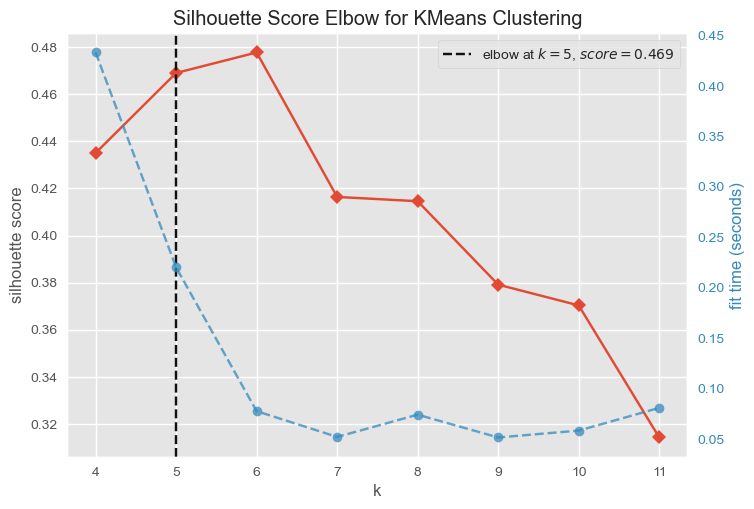

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [28]:
# Your code here...
visualizer = KElbowVisualizer( KMeans(n_init=2), k=(4,12), metric='silhouette')

visualizer.fit(final_data[scaled_feature_columns].sample(10000))
visualizer.show()

## Another Way to Visualize Clustering Performance
The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model. The score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering. (http://www.scikit-yb.org/en/latest/api/cluster/silhouette.html)


### Your Turn!
Using the YellowBrick `SilhouetteVisualizer`, try visualizing models with various values of `K`.

**Note**:  This visualization is quite expensive, so I recommend performing this using a sample o your original data.

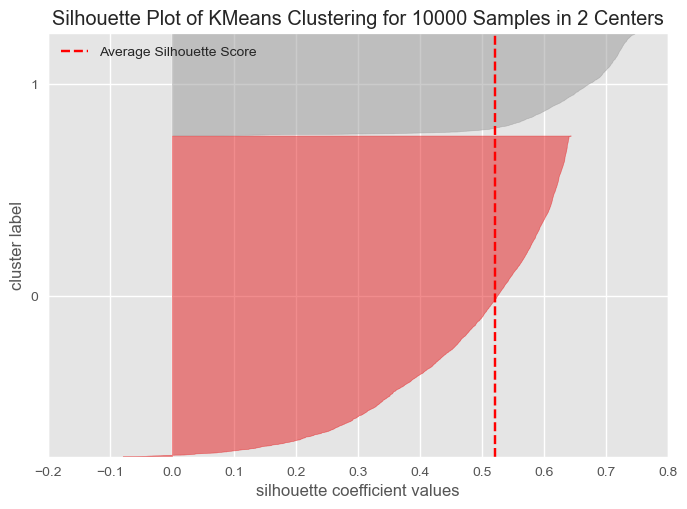

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [29]:
# Your code here...
visualizer = SilhouetteVisualizer( KMeans(n_clusters=2, n_init=2))

visualizer.fit(final_data[scaled_feature_columns].sample(10000))
visualizer.show()

## DBSCAN
Now that you've tried K-Means, let's try doing some clustering using DBSCAN (http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).  Remember that the main tuning parameters for DBSCAN are:

* **epsilon (eps)**:  The minimum distance between two samples 
* **min_samples**:  The minimum number of samples needed to form a neighborhood

By default epsilon is 0.5 and the min_samples is 5. First, try DBSCAN with the default options.  If you use the `fit_predict()` function, you can save the results in a new column in your data.  

How did this compare with K-Means?  Given that you actually know what the data really is, how did DBSCAN do in terms of identifing meaningful clusters?  Look at the `dsrc` column and do `value_counts()` for the various neighhborhoods.  What did you notice?

Try again, but this time experiment with the values of epsilon and min_samples and see what DBSCAN comes up with. 

In [30]:
dbscan = DBSCAN(min_samples=50)

In [31]:
final_data['dbs_default'] = dbscan.fit_predict(final_data[scaled_feature_columns])

In [32]:
final_data['dbs_default'].value_counts()

 1    39301
 2     9973
 0     2500
-1      284
 4      259
 3      116
 5       45
Name: dbs_default, dtype: int64

In [33]:
final_data[final_data['dbs_default'] == 1 ]['dsrc'].value_counts()

cryptolocker    10000
necurs           9990
nivdort          9978
alexa            9330
gameoverdga         3
Name: dsrc, dtype: int64

In [34]:
final_data[final_data['dbs_default'] == 1 ][['dsrc','domain']].sample(10)

,dsrc,domain
48627,alexa,centro
4700,cryptolocker,sumkrgpcdncdt
24001,necurs,ptyrqbsgvstpoqeknfqx
3750,cryptolocker,bqckydcchvkbm
3762,cryptolocker,qvypnngqmlvkp
45231,alexa,sensortower
22792,necurs,pyvvgoprntg
31490,necurs,vqdrtwcgwbeuabblnju
5160,cryptolocker,teojclpghmpolnr
12087,cryptolocker,xbowwxsrvfkhuo


In [35]:
final_data[final_data['dbs_default'] == -1 ]['dsrc'].sample(10)

51095    alexa
46425    alexa
52446    alexa
48215    alexa
47060    alexa
46964    alexa
43558    alexa
49011    alexa
47846    alexa
45548    alexa
Name: dsrc, dtype: object

In [36]:
final_data['domain'][final_data['dsrc'] == "nivdort"].sample(5)

36048     signonly
37705     spotwing
34412     fairnice
41985     yardgoes
40126    ablesince
Name: domain, dtype: object

In [37]:
final_data[final_data['dbs_default'] == 2 ]['dsrc'].value_counts()

gameoverdga    9973
Name: dsrc, dtype: int64

In [38]:
final_data[final_data['dbs_default'] == 1 ]['dsrc'].value_counts()

cryptolocker    10000
necurs           9990
nivdort          9978
alexa            9330
gameoverdga         3
Name: dsrc, dtype: int64

In [39]:
final_data[final_data['dsrc'] == "cryptolocker"]['domain'].sample(10)

4415      xuissgdagapkut
12320    haothfjmgfjypsv
12349    rwjeeunaggulnmo
11735       ypiinitglrsr
4149     gxfppsgwanplfmj
7903        nuroeiqkuicg
3938        ipvnyfatjvil
8295     hkeychhbwcjubqx
10504     ppvdkaotlgvmfm
3628       dsgibbjnwbhce
Name: domain, dtype: object

In [40]:
final_data[final_data['dsrc'] == "necurs"]['domain'].sample(10)

27503    cbquqhhphdvtaxdjpqcvr
29326     fgtkduvtwuhghxsmfafe
28515          ijepbdptjocryte
23387             tmkwvatlwgtw
27008         bbmpnvbabyondlej
30930              kmtleqvxqvk
22520              dosivelgrhn
31467     dmcgrxqjdqtipyllqyjd
32138              wflqbjjvuda
25391       efqiygbalywkukqhty
Name: domain, dtype: object